In [27]:
# # import os
# os.system("python -m pip install git+'https://github.com/Cufix/tinycocoapi.git#egg=pycocotools&subdirectory=PythonAPI' > /dev/null")

In [40]:
import json
import os
import warnings
warnings.filterwarnings(action='ignore')

from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
sds = pd.read_csv('SDS-test.csv')
sds

,method,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl,TP,FP,FN,P,R,F1
0,ss_sds1-mulscales100_d7_nms65_obs07,50.654704,83.890455,53.790495,-100.0,35.258944,46.569533,58.811303,39.332674,66.559087,26.335152,59.629930,59.634479,-100.0,41.569129,58.197108,67.009029,44.855973,70.153467,42190.0,9634.0,5488.0,81.410157,88.489450,84.802316
1,st_sds1-mulscales100_d0_nms00_obs05,51.581792,84.288537,55.306639,-100.0,35.855033,48.831471,60.070512,39.030374,65.744591,26.866072,60.776152,60.795459,-100.0,42.173484,60.579449,68.282169,45.503883,69.691675,42471.0,10548.0,5207.0,80.105245,89.078820,84.354052
2,st_sds1-mulscales100_d7_nms00_obs05,51.728202,84.353520,55.343981,-100.0,35.471835,48.981077,60.150860,39.692017,66.624496,26.907696,60.740225,60.757751,-100.0,41.710380,60.490241,68.251070,45.974116,71.107665,42523.0,10393.0,5155.0,80.359438,89.187885,84.543810
3,st_sds1-mulscales100_d7_nms00_obs07,51.633473,84.102667,55.220152,-100.0,35.276564,48.728143,60.131788,39.632094,66.513270,26.883951,60.828162,60.855180,-100.0,41.926651,60.647542,68.243085,45.976780,70.974078,42565.0,11739.0,5113.0,78.382808,89.275976,83.475515
4,st_sds1-mulscales100_d7_nms65_obs07,50.872198,84.354675,54.056944,-100.0,35.201394,47.242174,58.764314,39.138443,66.551454,26.700476,60.051643,60.056389,-100.0,41.548737,59.146707,67.026673,44.606158,70.802322,42352.0,10507.0,5326.0,80.122590,88.829229,84.251569
5,st_sdss-mulscales100_d0_nms00_obs05,51.055691,82.054139,55.443681,-100.0,33.727771,47.182026,61.272614,39.449452,64.864284,26.363915,58.909009,58.924632,-100.0,39.067143,57.924401,68.101932,45.261920,71.421955,41560.0,8931.0,6118.0,82.311699,87.168086,84.670313
6,st_sdss-mulscales100best_d0_nms00_obs05,50.884540,81.895624,55.184869,-100.0,32.993278,47.070286,61.224869,38.831340,65.482544,26.123517,58.917257,58.938607,-100.0,38.476200,57.870743,68.465007,44.526830,71.144442,41583.0,9628.0,6095.0,81.199352,87.216326,84.100355
7,st_sdss-mulscales100bigger_d0_nms00_obs05,51.539971,82.760310,56.350796,-100.0,33.260041,47.577722,62.270803,39.332522,66.884603,26.465869,59.468726,59.497364,-100.0,38.934643,57.798545,69.353219,45.185717,74.751908,41823.0,9875.0,5855.0,80.898681,87.719703,84.171228
8,st_sdss-mulscales300_d0_nms00_obs05,52.547832,82.975382,57.708023,-100.0,31.875594,50.493208,62.780485,37.911592,70.225909,26.487467,60.397893,60.430720,-100.0,38.141975,60.061080,69.722643,43.882581,75.395197,41967.0,11537.0,5711.0,78.437126,88.021729,82.953490
9,st_sdss-mulscales_d0_nms00_obs05,50.651365,82.177366,54.962305,-100.0,31.676427,47.407140,61.467803,39.951122,65.484633,26.141910,58.611685,58.626516,-100.0,37.713183,57.546409,68.330180,44.939415,70.735528,41608.0,8881.0,6070.0,82.410030,87.268761,84.769831


In [43]:
sds.iloc[[17,19,21]]

,method,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl,TP,FP,FN,P,R,F1
17,st_sds1-mulscales300_d7_nms00_obs01,53.077523,84.978447,57.688716,-100.0,34.290030,52.141302,61.680027,37.435987,70.864614,26.943305,62.048631,62.080886,-100.0,40.844230,62.641373,69.909697,43.795642,75.475310,42836.0,11906.0,4842.0,78.250703,89.844373,83.647725
19,st_sds1-mulscales300_d7_nms00_obs05,53.156056,85.147010,57.783806,-100.0,34.168249,52.394619,61.720946,37.673786,71.096852,26.941200,62.219821,62.265127,-100.0,40.846255,63.011227,69.974199,44.169920,75.723402,42886.0,12709.0,4792.0,77.140031,89.949243,83.053654
21,st_sds1-mulscales300_d0_nms00_obs05,53.012644,85.249188,57.596359,-100.0,34.599176,52.031779,61.459011,37.456140,70.836515,26.955963,62.305539,62.345777,-100.0,41.661110,62.893922,69.914584,44.071856,75.338144,42783.0,13179.0,4895.0,76.450091,89.733210,82.560787


In [26]:
sds.iloc[[12,14]]

,method,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl,TP,FP,FN,P,R,F1
12,st_sdss-mulscales300_d0_nms00_obs05_ff,47.714382,78.595835,51.797943,-100.0,32.843489,48.268415,54.215573,37.859365,66.207850,26.436855,56.995164,57.008169,-100.0,39.025892,58.328129,62.180621,46.909534,73.734892,40470.0,27342.0,7208.0,59.679703,84.881916,70.083990
14,st_sdss-mulscales300_d0_nms65_obs05_ff,48.808083,82.902038,53.160863,-100.0,32.599803,46.081365,55.012766,41.514647,70.211225,26.167225,57.382694,57.386056,-100.0,38.586451,55.693033,62.939433,47.127242,75.019084,41475.0,22356.0,6203.0,64.976265,86.989807,74.388614


In [2]:
# glob("debug-errors/**/results-*.json", recursive=True)

In [3]:
# th = 0.2
th = 0.01
# th = None

subdirs = [
    # 'roi-fixes-resize',
    # 'roi-fixes-resize-dilate',
    # 'roi-track-fixes-resize-binary-trk',
    # 'roi-track-fixes-resize-binary-trk-padding',
    # 'roi-fixes-resize-dilate-thresholded-mask',
    # 'roi-fixes-resize-dilate7-thresholded-mask',
    # 'roi-fixes-resize-dilate7-padding10-thresholded-mask',
    # 'roi-fixes-resize-dilate7-padding10-letterbox-thresholded-mask',
    # 'roi-fixes-resize-padding10-thresholded-mask',
    # 'roi-track-binary-fixes-resize-dilate7-padding10-letterbox-thresholded-mask-check-mot-coords-delay1',
    'after-ZF-changes/roi-p10-d7-letterbox/SDS-crops-mul-scales-100',
    'after-ZF-changes/roi-p10-d7-letterbox/SDS-crops-mul-scales',
    
] 

all_metrics = []
for subdir in subdirs:
    detections = [
        # f'{subdir}/MTSD-article-nms/results-val.json',
        # f'{subdir}/MTSD-nodil/results-val.json',
        # f'{subdir}/MTSD-nodil-naive/results-val.json',
        # f'{subdir}/MTSD-nodil-noobs/results-val.json',
        # f'debug-errors/{subdir}/Zebra/results-val.json',
        # # f'debug-errors/{subdir}/MTSD/results-val.json',
        # f'debug-errors/{subdir}/SDS-crops-split-seqs/results-test_dev.json',
        f'debug-errors/{subdir}/results-test_dev.json',
        # # f'debug-errors/{subdir}/DC/results-test_minus_val.json'
    ]


    gts = [
        # 'data/3DZeF20/val.json',
        # 'data/MTSD/val.json',
        # 'data/MTSD/val.json',
        # 'data/MTSD/val.json',
        # 'data/MTSD/val.json',
        'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/DroneCrowd/test_minus_val.json',
    ]


    names = ['method', 'dataset', 'AP', 'AP50', 'AP75', 'APu', 'APvt', 'APt', 'APs', 'APm', 'APl', 'AR1', 'AR10', 'AR100', 'ARu', 'ARvt', 'ARt', 'ARs', 'ARm', 'ARl']
    # names = ['method', 'dataset', 'AP', 'AP50', 'AP75', 'APu', 'APvt', 'APt', 'APs', 'APm', 'APl', 'AR100', 'AR500', 'ARu', 'ARvt', 'ARt', 'ARs', 'ARm', 'ARl']

    for det_path, gt_path in zip(detections, gts):
        if not os.path.isfile(det_path):
            print(det_path)
            continue
            
#         if 'DC' not in det_path:
#             print(det_path)
#             continue
            
        
            
        det = json.load(open(det_path))
        print(len(det))
        det = [x for x in det if x['score'] >= th] if th is not None else det
        print(len(det))
        
        th_path = det_path.replace('.json', f'-mapped.json')
        with open(th_path, 'w', encoding='utf-8') as f:
            json.dump(det, f, ensure_ascii=False, indent=4)
    
        method, ds = os.path.dirname(det_path).split(os.sep)[-2:]
        anno = COCO(gt_path)

        pred = anno.loadRes(th_path)  # init predictions api
        eval = COCOeval(anno, pred, 'bbox') #, [100, 500])
        # eval = COCOeval(anno, pred, 'bbox')

        imgIds = sorted(anno.getImgIds())
        eval.params.imgIds = imgIds

        eval.evaluate()
        eval.accumulate()
        eval.summarize()
        map, map50 = eval.stats[:2]

        stats = {k:v for k,v in zip(names, [method, ds] + [x*100 for x in eval.stats.tolist()])}
        all_metrics.append(stats)

    metrics = pd.DataFrame(all_metrics)
    # metrics.to_csv(f'debug-errors/{subdir}-metrics-DC-500.csv', index=False)

65621
65621
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Loading and preparing results...
DONE (t=28.98s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=14.45s).
Accumulating evaluation results...
DONE (t=8.50s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.507
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.839
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.538
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= micro | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=v-tiny | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=  tiny | maxDets=100 ] = 0.467
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.588
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.393
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= 

In [4]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,SDS-crops-mul-scales-100,50.684313,83.934175,53.825437,-100.0,35.259204,46.653868,58.808461,39.269928,66.335724,26.337025,59.639735,59.644283,-100.0,41.570463,58.233914,67.018156,44.867056,69.690283
1,roi-p10-d7-letterbox,SDS-crops-mul-scales,50.435689,83.895313,53.852430,-100.0,33.193982,46.775805,59.156317,39.464071,65.143533,25.996178,59.255796,59.265486,-100.0,39.907727,57.977685,67.233396,44.374059,67.600588


In [16]:
all_metrics = glob('debug-errors/*.csv')

to_concat = []
for m in all_metrics:
    df = pd.read_csv(m)
    df = df[df.dataset=='MTSD']
    df['method'] = os.path.splitext(os.path.basename(m))[0]
    to_concat.append(df)
    
df = pd.concat(to_concat, ignore_index=True)
df

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-fixes-resize-dilate-metrics,MTSD,39.564710,66.623220,43.240226,16.596825,39.809174,50.725564,45.180682,34.805801,39.316423,45.476134,55.491339,55.550164,25.017241,50.901435,61.511967,59.282075,48.183019,52.761538
1,roi-metrics,MTSD,33.362950,56.335512,36.479541,15.970621,37.867796,43.626180,35.278424,23.950765,41.595934,39.678304,48.702074,48.758448,24.317508,48.801454,54.533199,47.176764,34.171845,56.484615
2,roi-fixes-resize-dilate-metrics-th02,MTSD,38.669309,65.142542,42.193728,16.026256,39.080144,49.826904,44.219246,32.969598,37.629792,42.468977,51.159942,51.180239,19.045926,47.414116,58.223298,54.123164,39.784049,37.976923
3,roi-fixes-resize-metrics,MTSD,39.397284,66.395449,42.877927,15.976484,39.813871,50.379997,44.953980,34.679431,39.540700,45.394283,55.493164,55.554699,24.319530,50.933791,61.541084,58.916747,48.173867,53.792308
4,roi-fixes-resize-metrics-th02,MTSD,38.658284,65.128986,42.059368,15.498846,39.092758,49.622992,43.983493,32.929405,37.643650,42.452202,51.281117,51.307303,18.603286,47.570946,58.453106,53.543472,40.145883,38.007692


In [15]:
pd.read_csv('debug-errors/roi-fixes-resize-metrics.csv')

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-fixes-resize,Zebra,69.817178,93.648688,79.303896,-100.000000,0.001926,26.664764,69.301986,72.664694,-100.00000,29.025982,77.157985,77.324837,-100.00000,4.117647,54.025316,76.695254,79.603387,-100.000000
1,roi-fixes-resize,MTSD,39.397284,66.395449,42.877927,15.976484,39.813871,50.379997,44.953980,34.679431,39.54070,45.394283,55.493164,55.554699,24.31953,50.933791,61.541084,58.916747,48.173867,53.792308
2,roi-fixes-resize,SDS,48.229030,81.057587,49.924225,-100.000000,29.118988,45.826406,56.384098,33.890921,63.59245,24.881930,58.221120,58.325856,-100.00000,36.111597,58.847328,67.069417,40.740353,67.829596
3,roi-fixes-resize,DC,14.315204,34.830995,8.551489,-100.000000,15.647411,4.083801,-100.000000,-100.000000,-100.00000,0.313671,2.960824,20.706856,-100.00000,20.679550,23.862299,-100.000000,-100.000000,-100.000000


In [35]:
csvs = glob(f'/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/*.csv')
csvs

['/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-v7tiny-640x640-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-track-fixes-resize-binary-trk-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-v7tiny-640x640-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-fixes-resize-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-v7tiny-512x512-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-v7tiny-512x512-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-fixes-resize-dilate-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-fixes-resize-dilate-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-fixes-resize-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI

In [ ]:
out_dir = '/home/kos/projects/PhD/EAAI/csvs/metrics'
os.makedirs(out_dir, exist_ok=True)

for csv in csvs:
    df = pd.read_csv(csv)[names]
    for i in range(len(df)):
        single_res = df.iloc[i]
        print(single_res)
        cols = [x for x in df.columns.tolist() if x not in ['method', 'dataset']]
        ds, method = single_res.dataset, single_res.method
        if 'th02' in csv:
            method = f'{method}-th02'
        single_res = pd.DataFrame(single_res[cols])
        single_res.T.to_csv(f'{out_dir}/{ds}-test-{method}.csv', index=False, header=cols)

In [36]:
csvs = glob('/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/*.csv')
csvs

['/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-v7tiny-640x640-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-track-fixes-resize-binary-trk-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-v7tiny-640x640-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-fixes-resize-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-v7tiny-512x512-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-v7tiny-512x512-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-fixes-resize-dilate-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/DC-test-roi-fixes-resize-dilate-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI/SDS-test-roi-fixes-resize-320x512-downscaled-and-crops.csv',
 '/home/kos/projects/PhD/EAAI/csvs/metrics/tinyROI

In [37]:
out_dir = "/home/kos/projects/PhD/EAAI/tables"
os.makedirs(out_dir, exist_ok=True)

In [38]:
from tabulate import tabulate
import latextable

dfs = []
tables = [
    ["SDS", "test"],
    ["DC", "test"]
]


for table in tables:
    ds, split = table
    cur_csvs = [x for x in csvs if split in x and os.path.basename(x).startswith(ds)]
    
    to_concat = []
    for csv in cur_csvs:
        df = pd.read_csv(csv)
        df["method"] = os.path.splitext(os.path.basename(csv))[0]
        to_concat.append(df)
    df = pd.concat(to_concat, ignore_index=True)
    df = df.round(1)
    df = df.sort_values(by='method')
    dfs.append(df)

    name = f'{out_dir}/tinyROI-{ds}-{split}.tex'

    row = df.iloc[0].values.tolist()
    indices = list(filter(lambda x: row[x] == -100, range(len(row))))

    maxes = df.max(axis=0).values.tolist()
    maxes = [x for i,x in enumerate(maxes) if i not in indices]
    
    header = [x for i,x in enumerate(df.columns.tolist()) if i not in indices]

    rows = []
    for i in range(len(df)):
        row = df.iloc[i].values.tolist()
        row = [x for i,x in enumerate(row) if i not in indices]

        formatted_row = []
        for j,x in enumerate(row):
            if isinstance(x, str):
                formatted_row.append(x)
                continue
            if x == maxes[j]:
                formatted_row.append('\\textbf{' + f'{x:.1f}' + '}')
            else:
                formatted_row.append(f'{x:.1f}')
        
        rows.append(formatted_row)

    open(name, 'w').write(tabulate(rows, header, tablefmt='latex_raw', stralign='center', numalign='left', floatfmt=".1f"))

In [39]:
df = dfs[0]
row = df.iloc[0].values.tolist()
indices = list(filter(lambda x: row[x] == -100, range(len(row))))
header = [x for i,x in enumerate(df.columns.tolist()) if i not in indices]
dfs[0] = dfs[0][header]

dfs[0]

,AP,AP50,AP75,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARvt,ARt,ARs,ARm,ARl,method
3,48.0,80.4,49.8,28.9,45.6,56.2,33.0,63.6,24.8,57.7,57.7,35.4,58.3,66.7,39.0,67.7,SDS-test-roi-fixes-resize-320x512-downscaled-a...
2,47.9,80.2,49.6,29.1,45.6,56.0,32.7,62.5,24.8,57.6,57.6,35.5,58.2,66.6,38.5,67.4,SDS-test-roi-fixes-resize-dilate-320x512-downs...
5,47.8,80.3,49.3,28.8,46.3,55.5,29.9,52.3,24.9,57.6,57.6,35.3,59.3,66.2,35.5,60.3,SDS-test-roi-track-fixes-resize-binary-trk-320...
4,48.5,82.2,50.3,30.2,46.0,57.4,30.9,57.8,25.2,57.9,57.9,36.1,59.0,66.4,36.8,63.1,SDS-test-roi-v7tiny-512x512
1,46.5,82.6,46.3,30.7,42.9,54.6,33.0,56.8,24.2,56.5,56.5,36.0,55.6,65.0,39.5,62.2,SDS-test-roi-v7tiny-512x512-crops
0,47.7,83.0,49.0,33.0,44.0,56.3,33.1,53.3,25.0,58.4,58.4,41.8,59.4,66.1,38.0,57.2,SDS-test-roi-v7tiny-640x640-crops


In [40]:
df = dfs[1]
row = df.iloc[0].values.tolist()
indices = list(filter(lambda x: row[x] == -100, range(len(row))))
header = [x for i,x in enumerate(df.columns.tolist()) if i not in indices]
dfs[1] = dfs[1][header]

dfs[1]

,AP,AP50,AP75,APvt,APt,AR500,ARvt,ARt,method
2,20.8,51.5,12.0,55.8,15.0,70.6,70.6,77.1,DC-test-roi-fixes-resize-320x512-downscaled-an...
4,19.9,49.2,11.5,54.7,12.4,68.9,68.8,76.7,DC-test-roi-fixes-resize-dilate-320x512-downsc...
1,20.1,49.4,11.9,54.4,14.1,68.6,68.6,76.1,DC-test-roi-track-fixes-resize-binary-trk-320x...
5,20.3,49.7,12.0,55.3,12.8,68.8,68.7,78.6,DC-test-roi-v7tiny-512x512
3,20.6,49.0,13.4,52.3,15.7,68.3,68.3,73.5,DC-test-roi-v7tiny-512x512-crops
0,20.2,48.6,12.6,51.8,12.6,70.7,70.7,77.2,DC-test-roi-v7tiny-640x640-crops


## Archive

In [28]:
current = json.load(open(f"{root_dir}/metrics.json"))
df = pd.DataFrame(current)

# pd.set_option("display.precision", 1)
# df = pd.DataFrame.from_records(all_metrics)
df

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,68.633912,92.724301,77.465436,0.000922,58.275363,70.708882,28.785276,76.295706,76.470552,2.340426,72.813990,77.862235
1,roi_track,73.178821,95.422710,84.198813,0.014378,63.105190,75.425218,29.225153,81.282822,81.647239,4.255319,77.034976,83.350421
2,track-backup,38.647307,47.195260,43.687858,0.000000,34.275715,39.442172,15.207362,40.661350,40.732515,0.000000,40.082141,41.092511
3,track-letterbox,72.494081,94.826237,82.645650,0.000703,63.633046,74.883387,29.113497,80.841718,81.196933,1.914894,76.687864,82.870645
4,track-sanity,73.033220,95.498121,83.350138,0.002976,64.637872,75.230254,29.161350,80.895706,81.173006,2.553191,76.796502,82.808170
5,track,73.033220,95.498121,83.350138,0.002976,64.637872,75.230254,29.161350,80.895706,81.173006,2.553191,76.796502,82.808170


In [11]:
current = json.load(open(f"{root_dir}/metrics.json"))
df = pd.DataFrame(current)

# pd.set_option("display.precision", 1)
# df = pd.DataFrame.from_records(all_metrics)
df

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,69.213369,93.250764,77.788104,0.000747,58.766428,71.370493,28.855828,76.589571,76.757055,1.489362,73.036566,78.172207
1,roi_track,72.556062,95.240482,83.302624,0.004412,63.881664,74.721926,29.201840,81.007362,81.241104,2.978723,76.497085,82.977173


In [24]:
baseline = pd.DataFrame(json.load(open("tests/baseline_metrics.json")))[['method', 'AP', 'AP50', 'AP75', 'APs', 'APm', 'APl', 'AR1', 'AR10', 'AR100', 'ARs', 'ARm', 'ARl']]
baseline = baseline[baseline.method.isin(['roi', 'track', 'roi_track'])]
baseline

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,67.232363,92.016314,73.489443,0.002542,58.474496,69.149416,28.746012,74.242331,74.326380,2.765957,71.799152,75.353624
1,roi_track,72.678713,95.764925,83.903849,0.001595,65.545544,74.742411,29.051534,80.731902,80.926380,2.340426,76.624271,82.527833
4,track,73.519353,95.580878,84.445795,0.003314,64.859055,75.937387,29.304294,81.144785,81.382209,2.340426,77.175411,82.955547


In [9]:
current = json.load(open(f"{root_dir}/metrics.json"))
df = pd.DataFrame(current)

# pd.set_option("display.precision", 1)
# df = pd.DataFrame.from_records(all_metrics)
df

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,67.226447,92.098012,73.486045,0.002537,58.447537,69.139330,28.743558,74.258896,74.347853,2.765957,71.849497,75.366440
1,roi_track,72.474941,95.745005,83.624113,0.002535,65.102331,74.418519,29.006748,80.550920,80.736810,3.404255,76.613672,82.274730
2,track,73.315740,95.465771,83.614382,0.000477,64.512132,75.724522,29.339877,80.966258,81.214110,1.914894,76.796502,82.852223


In [8]:
df.columns

Index(['method', 'num_images', 'FPS', 'AP', 'AP50', 'AP75', 'APs', 'APm',
       'APl', 'AR1', 'AR10', 'AR100', 'ARs', 'ARm', 'ARl'],
      dtype='object')

In [9]:
# all_metrics

<Figure size 432x288 with 0 Axes>

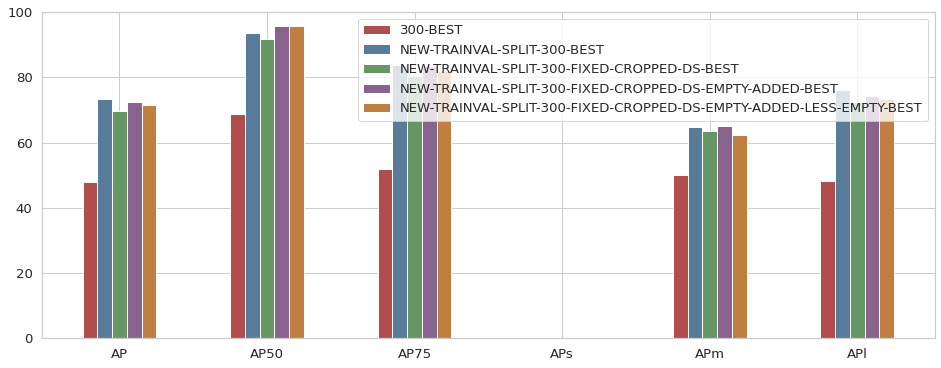

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

all_metrics = [OrderedDict(_) for _ in all_metrics]

metrics = [x for x in df.columns if 'AP' in x or 'FPS' in x]
names = [x.replace('yolov7-tiny-', '') for x in df.method.tolist()]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.1  # the width of the bars

sns.set(style = 'whitegrid', font_scale = 1.2)
sns.set_palette(sns.color_palette("Set1", desat=0.5))
plt.tight_layout()

plt.figure(figsize=(16,6))
ax  = plt.gca()

rects = []
for i, r in enumerate(names):
    values = [x for x in all_metrics if x['method'].replace('yolov7-tiny-', '') == r][0]
    values_ = [v for k,v in values.items() if 'AP' in k or 'FPS' in k]
    rect = plt.bar(ind+i*width, values_, width)
    rects.append(rect)

plt.ylim([0,100])
plt.xticks(ind + 2*width, metrics, rotation=0)
plt.legend( [rect[0] for rect in rects], [_.upper() for _ in names])
# os.makedirs(f"plots/{subdir}", exist_ok=True)
# plt.savefig(f'plots/{subdir}/AP.png',bbox_inches='tight', pad_inches=0)

([<matplotlib.axis.XTick at 0x7036fc2564c0>,
 [Text(0.2, 0, 'AR1'),
  Text(1.2, 0, 'AR10'),
  Text(2.2, 0, 'AR100'),
  Text(3.2, 0, 'ARs'),
  Text(4.2, 0, 'ARm'),
  Text(5.2, 0, 'ARl')])

<Figure size 432x288 with 0 Axes>

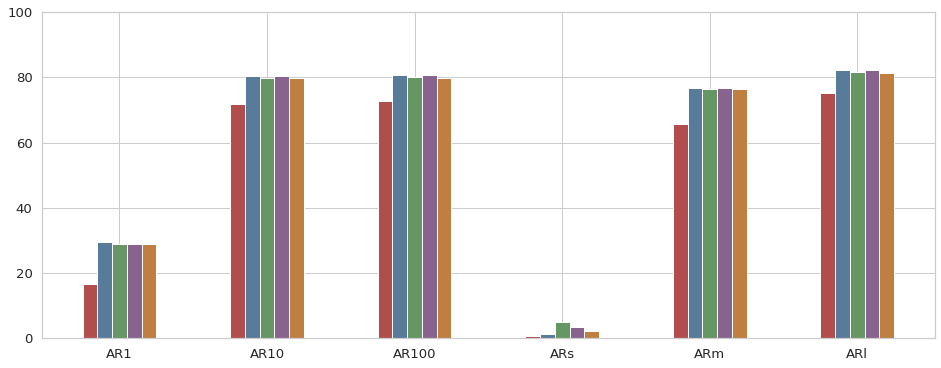

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

all_metrics = [OrderedDict(_) for _ in all_metrics]

metrics = [x for x in df.columns if 'AR' in x or 'FPS' in x]
names = df.method.tolist()

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.1  # the width of the bars

sns.set(style = 'whitegrid', font_scale = 1.2)
sns.set_palette(sns.color_palette("Set1", desat=0.5))
plt.tight_layout()

plt.figure(figsize=(16,6))
ax  = plt.gca()

rects = []
for i, r in enumerate(names):
    values = [x for x in all_metrics if x['method'] == r][0]
    values_ = [v for k,v in values.items() if 'AR' in k or 'FPS' in k]
    rect = plt.bar(ind+i*width, values_, width)
    rects.append(rect)

plt.ylim([0,100])
plt.xticks(ind + 2*width, metrics, rotation=0)
# plt.legend( [rect[0] for rect in rects], [_.upper() for _ in names])
# plt.savefig(f'plots/{subdir}/AR.png',bbox_inches='tight', pad_inches=0)